In [1]:
from importlib import reload 
import sys
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.spatial.distance import braycurtis
from scipy.special import softmax
import seaborn as sns
# # adding Folder_2 to the system path
# sys.path.insert(0, r'C:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\code')
# # sys.path.insert(0, r'C:\Users\yuvald\Documents\Uni\סמסטר ב\workshop_microbiome\code')

from imports import  *

import model_class
reload(model_class)


<module 'model_class' from 'c:\\Users\\tomer\\Desktop\\BSc\\year3\\sem B\\workshop_microbiome\\Milestone2\\model_class.py'>

$$f(D,\Delta_t) = \alpha e^{-\lambda \Delta_t} \cdot \cos\left(\frac{2 \pi \Delta_t}{365}\right) D_{t-1} + \left(1 - \alpha e^{-\lambda \Delta_t} \cdot \cos\left(\frac{2 \pi \Delta_t}{365}\right)\right) \cdot \overline{\{D_1,...,D_{t-2}\}}$$

In [2]:
import model_class
reload(model_class)


<module 'model_class' from 'c:\\Users\\tomer\\Desktop\\BSc\\year3\\sem B\\workshop_microbiome\\Milestone2\\model_class.py'>

In [3]:
data_path = r"train_data.csv"
metadata_path = r"train_metadata.csv"

In [4]:
metadata_df = pd.read_csv(metadata_path)

In [5]:
metadata_df.columns

Index(['sample', 'baboon_id', 'collection_date', 'sex', 'age', 'social_group',
       'group_size', 'rain_month_mm', 'season', 'hydro_year', 'month',
       'diet_PC1', 'diet_PC2', 'diet_PC3', 'diet_PC4', 'diet_PC5', 'diet_PC6',
       'diet_PC7', 'diet_PC8', 'diet_PC9', 'diet_PC10', 'diet_PC11',
       'diet_PC12', 'diet_PC13'],
      dtype='object')

In [6]:
metadata_df.social_group.unique()

array(['g_1.22', 'g_2.2', 'g_1.1', 'g_1.12', 'g_1.21', 'g_1.211',
       'g_1.11', 'g_2.1', 'g_2.12', 'g_2.11'], dtype=object)

In [7]:
# data_df = pd.read_csv(r"C:\Users\yuvald\Documents\Uni\סמסטר ב\workshop_microbiome\train_data.csv", index_col="sample")
# metadata_df = pd.read_csv(r"C:\Users\yuvald\Documents\Uni\סמסטר ב\workshop_microbiome\train_metadata.csv",  index_col="sample")

In [8]:
super_model = model_class.superModel(data_path, metadata_path)

In [9]:
baboons_models = super_model.baboons

In [10]:
for baboon in super_model.baboons:
    baboon.alpha_ = np.zeros([61,61])
    baboon.beta_ = np.eye(61,61)



In [11]:
new_baboon = baboons_models[10]
super_model.baboons = super_model.baboons[:3]


In [12]:
baboon1_meta = super_model.baboons[0].metadata
baboon2_meta = super_model.baboons[1].metadata
baboon3_meta = super_model.baboons[2].metadata

new_baboon_meta = new_baboon.metadata

In [13]:
# model_class.non_iterative_predictor(new_baboon.data, new_baboon.metadata, baboons_models[0].alpha_, baboons_models[0].beta_, 0)


np.repeat(transformation(new_baboon.data, type = "clr")[-1].values, 12)

KeyError: -1

In [13]:
new_baboon.data = new_baboon.data[:10]
super_model.predict(new_baboon.data, new_baboon_meta)

ValueError: could not broadcast input array from shape (71,) into shape (3,)

In [7]:
baboon_101 = super_model.baboons[0]

In [26]:
def objective(beta, lambda_, baboon):
    # calculate the objective function

    '''for the ith row in self.data (from row 3)
    1. calculate mean of previous i-2 rows = d_mean
    2. calculate time difference between ith row and i-1th row = d_time
    calculate the prediction for the ith row using the formula'''


    '''
    calculate difference between prediction and actual value using bray-curtis dissimilarity and return the sum/mean -TBD'''

    alpha = np.zeros([61,61])
    #beta = alpha_beta[61*61:].reshape(61,-1)


    D_t1 = baboon.transformed_data[1:-1].values
    D_mean = baboon.df_cumulative_mean[:-2].values
    cos = 0# np.cos((2*np.pi*self.delta_t[2:].values)/365)
    exp = np.exp(-lambda_*baboon.delta_t[2:].values)

    f = alpha@(exp*cos*D_t1.T) + beta@((1-exp*cos)*D_mean.T)

    f = to_composition(f.T, type = 'clr') # transpose f to match the shape of D - each row is a sample

    # calculate bray-curtis dissimilarity
    bc =  np.array([braycurtis(baboon.data.values[i+2], f[i]) for i in range(len(f))])

    return bc.mean()

<function model_class.baboon_similarity(baboon1, baboon2)>

In [9]:
counts = pd.read_csv(r"count.csv", index_col="library_name")["read_count"].values
counts.sort()
counts

array([  1319,   1325,   1401, ..., 259294, 509089, 566335], dtype=int64)

(0.0, 200000.0)

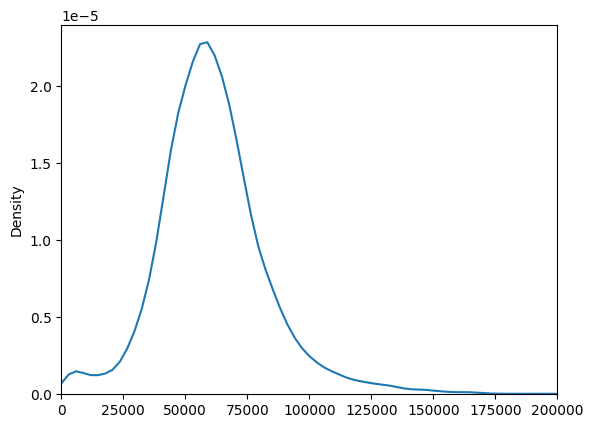

In [10]:
sns.kdeplot(counts)
plt.xlim(0, 200000)